# Plant composition

Alex Koiter

## Load Libraries

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

## Load data

In [ ]:
data <- read_excel(here::here("./notebooks/MBFI EXT 28 Keep Grazing Data 2019.xlsx"), sheet = 1)  %>% 
  mutate_all(~str_replace(., "<1", "0.1")) %>% 
  mutate(across(everything(), ~replace_na(.x, "0"))) %>% 
  mutate(across(`Poa pratensis`: `Phragmites australis`, ~as.numeric(.x))) %>%
  mutate(Plot = case_when(Plot == "High Density" ~ "High Graze",
                          Plot == "Low Density" ~ "Regular Graze", 
                          TRUE ~ Plot)) %>%
  mutate(`Area in landscape` = case_when(`Area in landscape` == "Upland" ~ "Upper",
                                         `Area in landscape` == "Midland" ~ "Middle",
                                         `Area in landscape` == "Lowland" ~ "Lower")) %>%
  pivot_longer(cols = `Poa pratensis`: `Phragmites australis`, names_to = "Plant", values_to = "Cover (%)") %>%
  mutate(location = paste(Plot, `Area in landscape`, sep= "-")) %>%
  mutate(total = sum(`Cover (%)`), .by = "Plant") %>%
  filter(total > 0) %>%
  arrange(total) %>%
  mutate(Plant = factor(Plant, level = unique(Plant)))


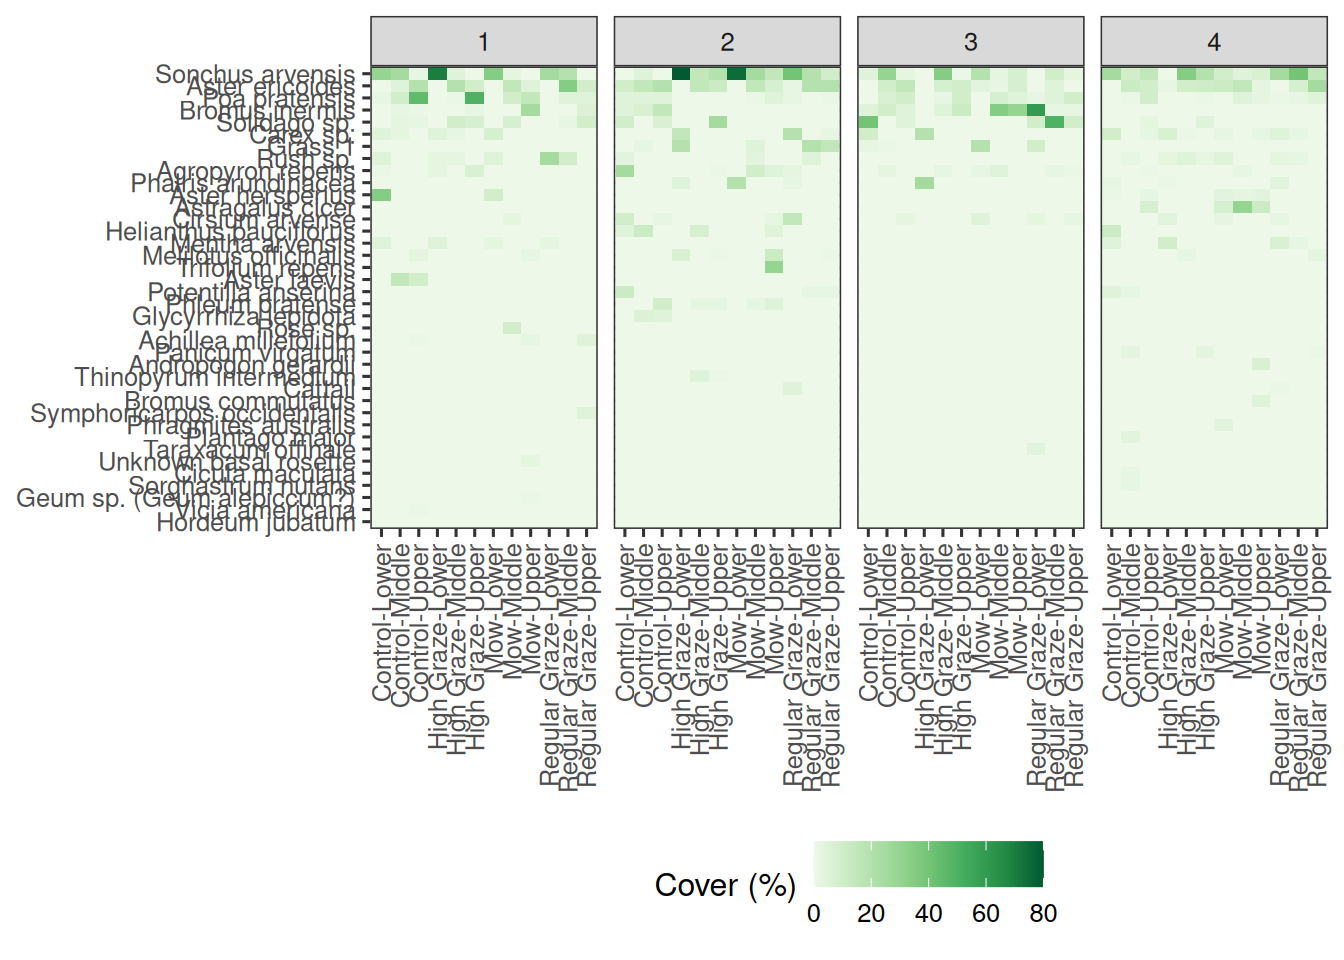

In [ ]:
#| 
p1 <- ggplot(data, aes(location, Plant, fill = `Cover (%)`)) + 
  geom_tile() +
  theme_bw(base_size = 12) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
        axis.title = element_blank(),
        legend.position = "bottom") +
  scale_fill_distiller(palette = "Greens", direction = 0) +
  facet_wrap(~Site, ncol = 4, scales = "free_x")
p1
